## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [12]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

Dependent variable(target) is charges as it is dependent on all the variables (based on problem statement in project)

Independent variables are age, sex, bmi, etc.


In [ ]:
df.shape          # Checking the dataset size

In [ ]:
df.info()         # To know Data type of parameters or columns

## Checking for Any Null value

In [ ]:
df.isnull().any()       # To check any null value

In [ ]:
df.isnull().sum()       # To get correct count of null values

## If null values present, then their replacement

In [ ]:
# If null values are in numerical parameters then replace it with median or mean
# If null values are in categorical (non-numerical) parameters then replace it with mode

In [ ]:
# For numerical column null-value replacement

df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
# For categorical column null-value replacement

df['region'].fillna(df['region'].mode(), inplace=True)

## Descriptive Statistics

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Check for Unique value in Categorical Columns

In [ ]:
df.region.nunique()

4

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Counting the values of Particular Column

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Correlation

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
df.corr().charges.sort_values(ascending=False)        # Getting correlation in descending order such that important obervations can be used for predicting

<ipython-input-33-7be3fd1c0218>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().charges.sort_values(ascending=False)        # Getting correlation in descending order such that important obervations can be used for predicting


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## Visualization

### Univariate Analysis

<ipython-input-35-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

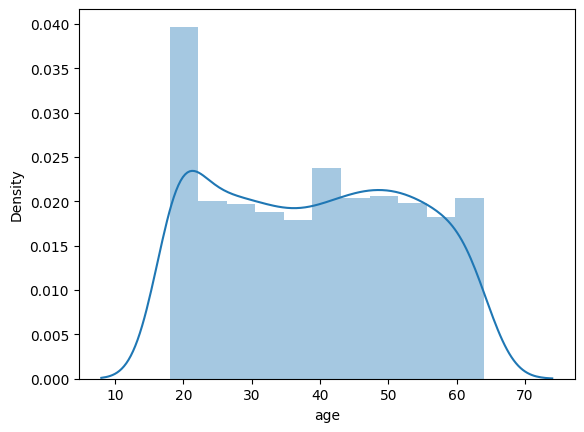

In [ ]:
# Distribution Plot

sns.distplot(df['age'])                   # or sns.distplot(df.age)

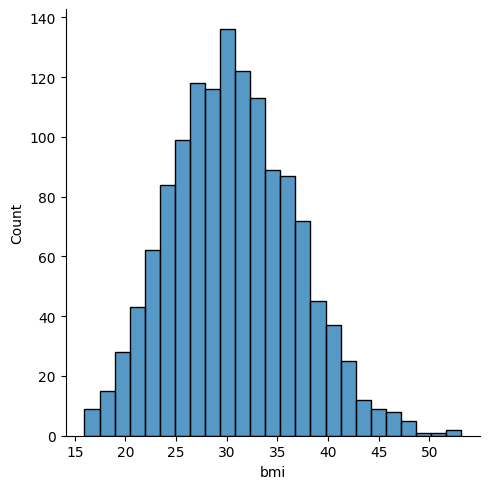

In [ ]:
sns.displot(df.bmi)

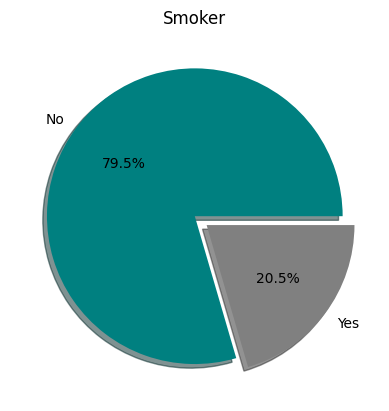

In [ ]:
plt.pie(df.smoker.value_counts(),[0,0.1], labels=['No','Yes'], autopct='%1.1f%%',shadow=True,colors=['teal','grey'])
plt.title("Smoker")
plt.show()

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

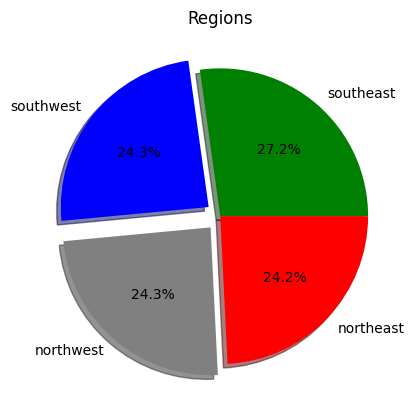

In [ ]:
plt.pie(df.region.value_counts(), [0,0.1,0.1,0], labels=['southeast','southwest','northwest','northeast'], autopct='%1.1f%%', colors=['green','blue','grey','red'], shadow=True)
plt.title("Regions")
plt.show()

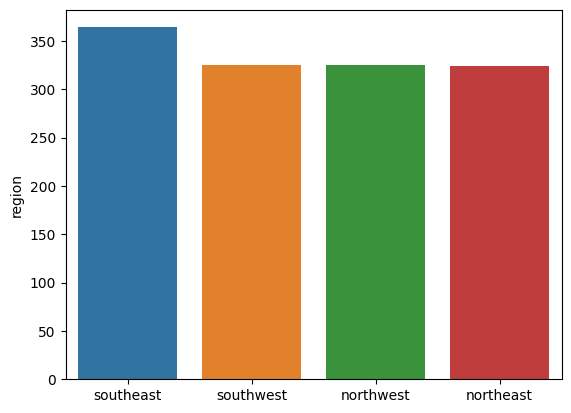

In [ ]:
sns.barplot(x=df.region.value_counts().index, y=df.region.value_counts())
plt.show()

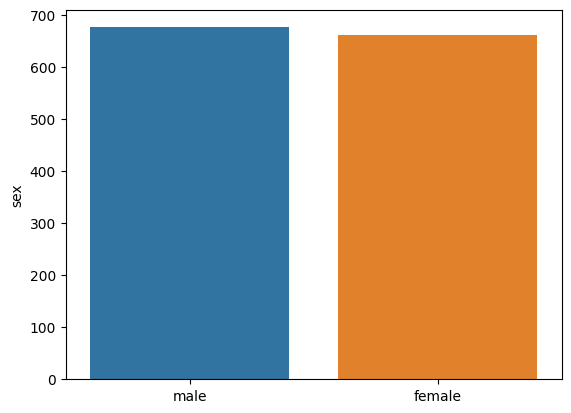

In [ ]:
sns.barplot(x=df.sex.value_counts().index, y=df.sex.value_counts())
plt.show()

### Bivariate Analysis

<Axes: xlabel='age', ylabel='charges'>

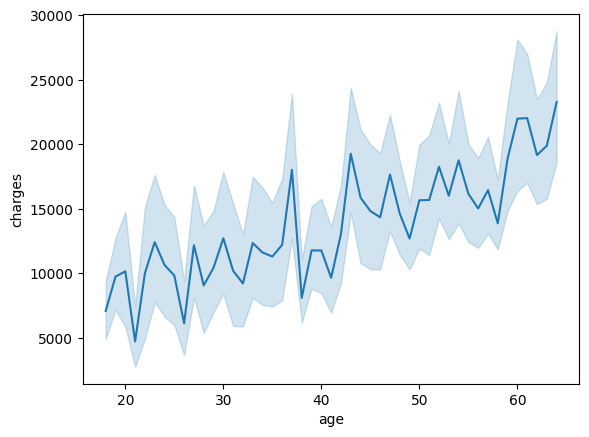

In [ ]:
sns.lineplot(x=df.age, y=df.charges)

<Axes: xlabel='age', ylabel='bmi'>

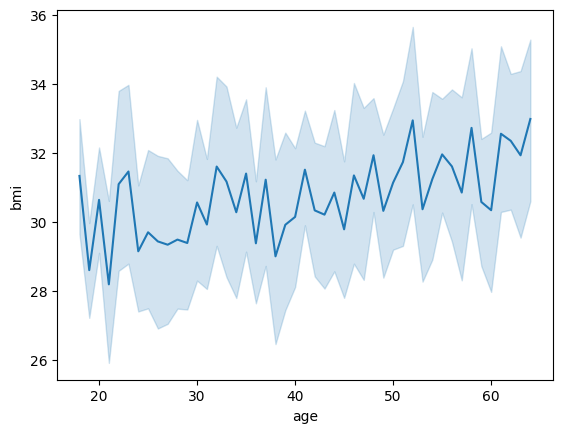

In [ ]:
sns.lineplot(x=df.age, y=df.bmi)

<Axes: xlabel='age', ylabel='charges'>

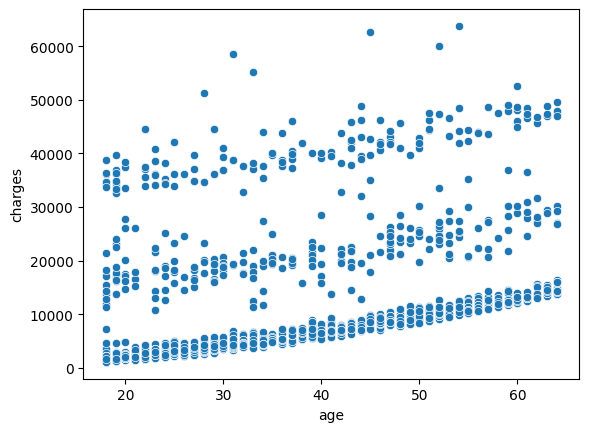

In [ ]:
sns.scatterplot(x=df.age, y=df.charges)

### Multivariate Analysis

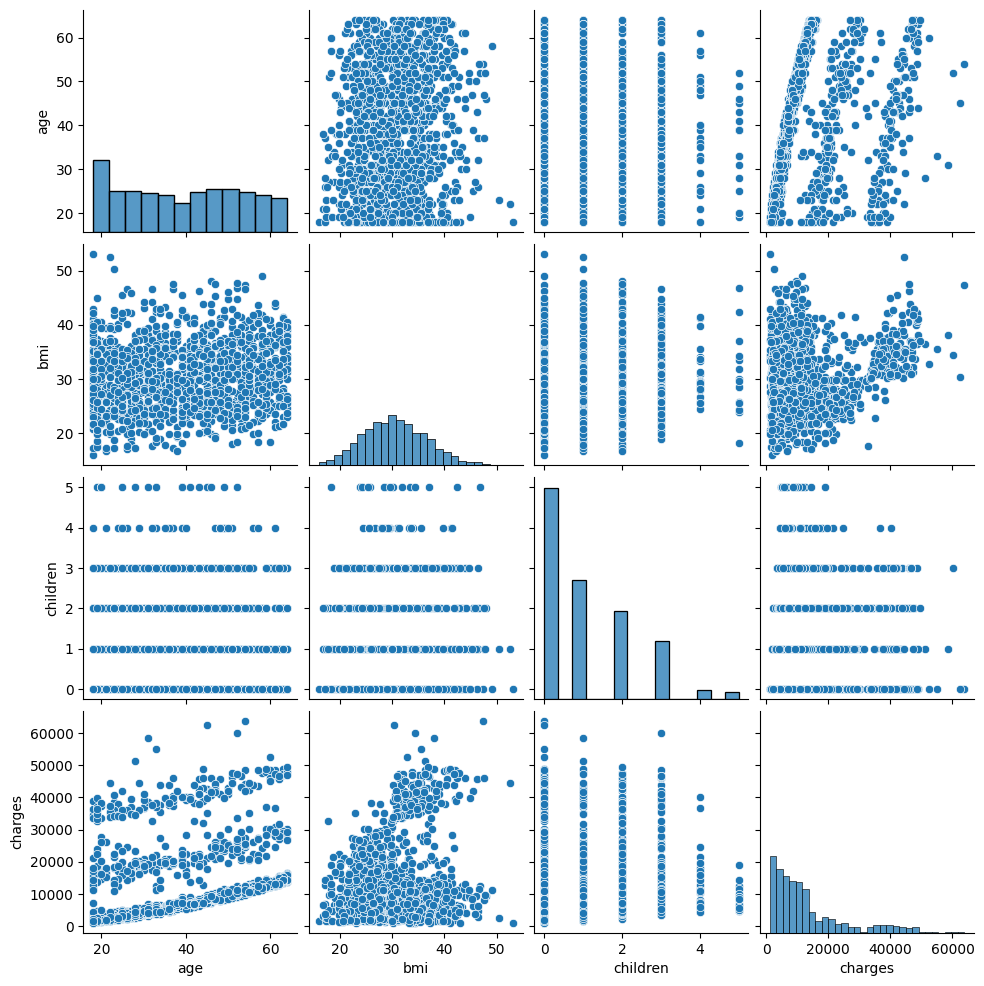

In [ ]:
sns.pairplot(df)

<ipython-input-78-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

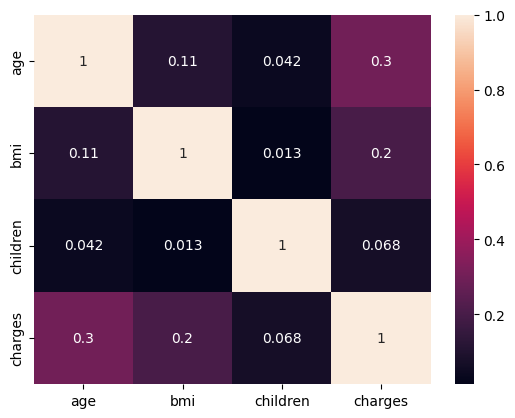

In [ ]:
sns.heatmap(df.corr(),annot=True)

### Outlier Detection

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

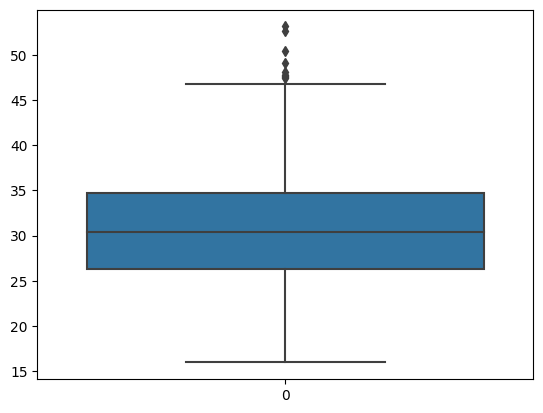

In [ ]:
sns.boxplot(df.bmi)

*We can see some dots on upper limit which are outliers so we need to remove then by replacing them with median.*

**Removing Outliers using Median Method**

In [ ]:
q1 = df.bmi.quantile(0.25)      # First Quantile q1
q3 = df.bmi.quantile(0.75)      # Third Quantile q3

In [ ]:
print(q1)
print(q3)

26.29625
34.69375


In [ ]:
IQR = q3-q1                     # Inter Quantile Range
IQR

8.3975

In [ ]:
upper_limit = q3 + 1.5*IQR        # Formula for Upper limit
print(upper_limit)

47.290000000000006


In [ ]:
lower_limit = q1 - 1.5*IQR        # Formula for Lower limit
print(lower_limit)

13.7


In [ ]:
df.median()

<ipython-input-96-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

Now re-write "BMI" Column, i.e, where the values are greater than upper limit we replace it with median

In [ ]:
df['bmi']=np.where(df['bmi']>upper_limit,30,df['bmi'])      # Condition/Formula for Removing Outlier and 30 is median

<Axes: >

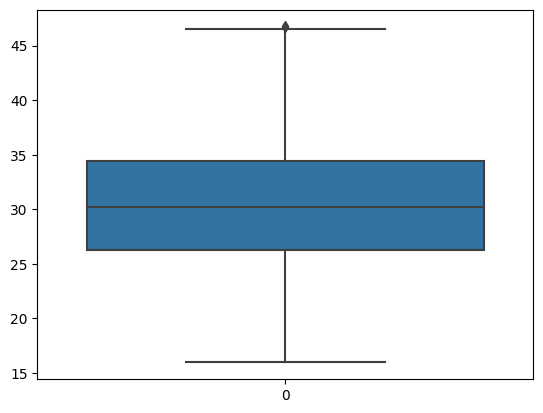

In [ ]:
sns.boxplot(df.bmi)

**Removing Outliner Using IQR Method**

<Axes: >

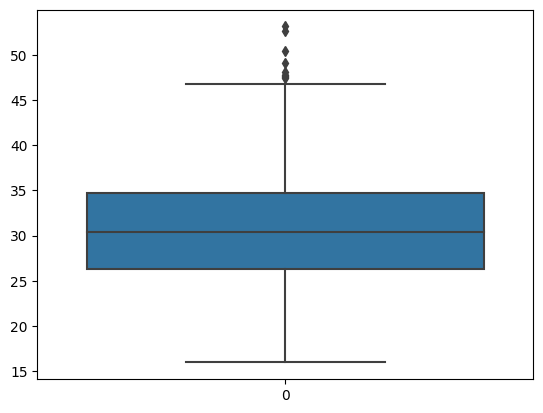

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
q1 = df.bmi.quantile(0.25)      # First Quantile q1
q3 = df.bmi.quantile(0.75)      # Third Quantile q3

In [ ]:
print(q1)
print(q3)

26.29625
34.69375


In [ ]:
IQR = q3-q1                     # Inter Quantile Range
IQR

8.3975

In [ ]:
upper_limit = q3 + 1.5*IQR        # Formula for Upper limit
print(upper_limit)

47.290000000000006


*Whatever value that comes after upper limit, we just remove it in this method and create a new df.*

In [ ]:
df = df[df.bmi<upper_limit]         # Condition/Formula for Removing outliner

<Axes: >

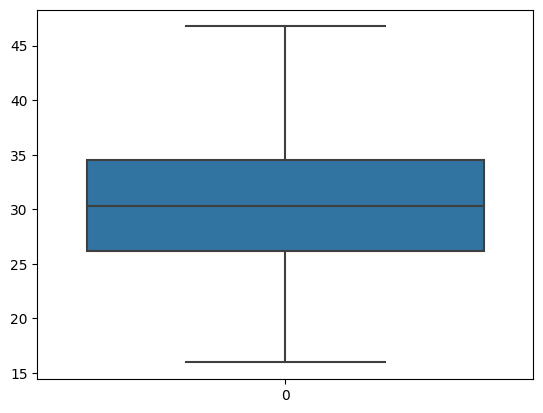

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1329, 7)

*Some obervations are removed by this method resulting in data loss but it do not effect our prediction or accuracy.*

**Removing Outlier using Z-Score**

<Axes: >

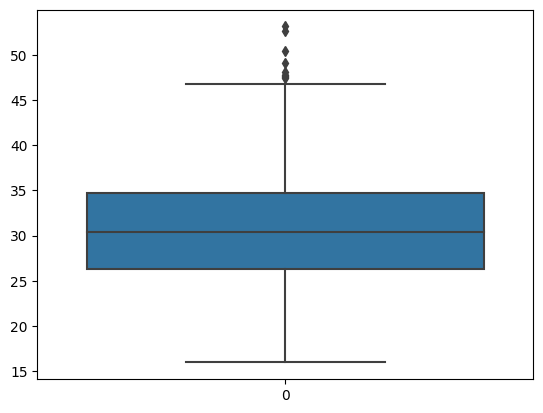

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1338, 7)

In [ ]:
from scipy import stats

In [ ]:
bmi_zscore = stats.zscore(df.bmi)
bmi_zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [ ]:
df_z=df[np.abs(bmi_zscore)<=3]         # Condition/Formula for Z-Score

<Axes: >

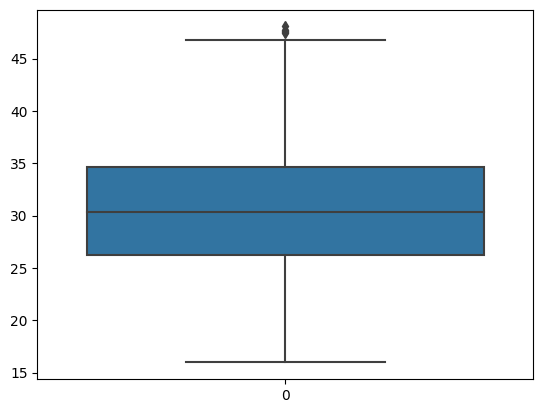

In [ ]:
sns.boxplot(df_z.bmi)

In [ ]:
df_z.shape

(1334, 7)

*Only 4 observation are removed with some outlier still present*

**Outlier removal using Percentile Method**

<Axes: >

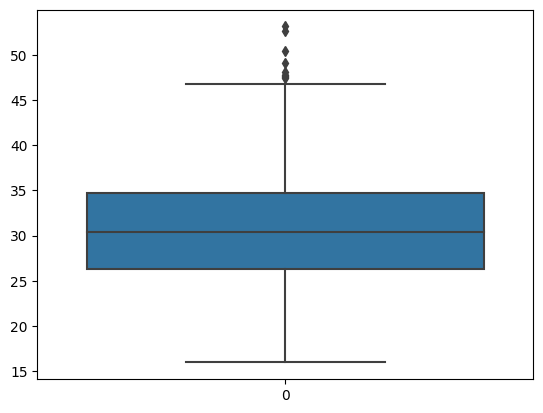

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1338, 7)

In [ ]:
p99 = df.bmi.quantile(0.99)                   # Beyond p99 we consider outlier
p99

46.40789999999996

In [ ]:
df_1 = df[df.bmi<=p99]                     # Formula/Condition for removing Outlier

<Axes: >

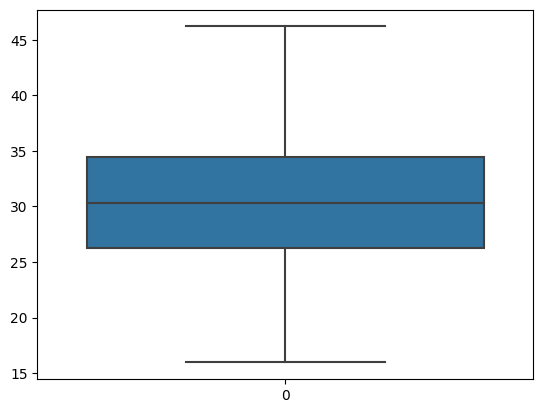

In [ ]:
sns.boxplot(df_1.bmi)

## Encoding the Data

In [28]:
df.head()             # Encoding is used to convert categorical data into numerical data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### Label Encoding Method

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()           # Initialization

In [21]:
df.sex = le.fit_transform(df.sex)                   # Encoding
df.smoker = le.fit_transform(df.smoker)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


*We can see that "sex" and "smoker" columns value changed from categorical to numeric*

### One-Hot Encoding Method

In [29]:
df_main=pd.get_dummies(df,columns=['region'])
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [30]:
df_main.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<ipython-input-31-2d8c4e8345b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)         # This heatmap includes the columns with categorical data converted to numerical data (i.e. ENCODED)


<Axes: >

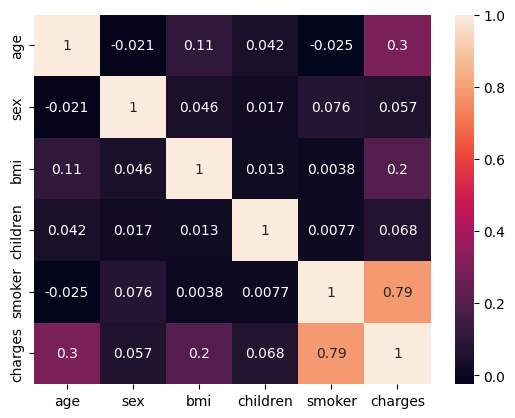

In [31]:
sns.heatmap(df.corr(),annot=True)         # This heatmap includes the columns with categorical data converted to numerical data (i.e. ENCODED)

In [32]:
df_main.corr().charges.sort_values(ascending=False)             # Will give columns which are most correlated

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

## Splitting the Dataset

**Independent(X) and Dependent(Y) Variable Split**

In [33]:
Y=df_main['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [34]:
X=df_main.drop(columns=['charges'],axis=1)        # axis=1 is used for dropping any column
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## Scaling on Independent Variables

*For Distance Based Algorithms such as KNN, Logistic, etc it is mandatory to scale data*

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [37]:
X_Scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)        # This will tranform data between range -1 to 1
X_Scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0


## Train Test Split

Generally 70-30 split, i.e, 70% for training and 30% for testing

In [39]:
from sklearn.model_selection import train_test_split

In [53]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, Y, test_size = 0.3, random_state=0)       # 0.3 bcz of 70-30 split
                                                                                                        # random_state is shuffling of data to avoid the bias

In [48]:
X_Train.shape

(936, 9)

In [55]:
X_Train.head()      # Indexes are shuffled due to random_state

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1163,0.000000,0.0,0.329701,0.0,0.0,1.0,0.0,0.0,0.0
196,0.456522,0.0,0.453054,0.0,0.0,0.0,0.0,0.0,1.0
438,0.739130,0.0,0.828356,1.0,0.0,0.0,0.0,1.0,0.0
183,0.565217,0.0,0.281141,0.0,0.0,0.0,1.0,0.0,0.0
1298,0.326087,1.0,0.309255,0.4,0.0,0.0,1.0,0.0,0.0


In [44]:
Y_Train.shape

(936,)

In [45]:
X_Test.shape

(402, 9)

In [46]:
Y_Test.shape

(402,)